In [4]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

sys.path.append("/home/VirtualFlaw/RT_Project/src")
from modules import preprocess


In [62]:
def image_centering(image, variance = 0):
    if abs(variance) > 500:
        print("variance is out of range")
        return None
    image_shape = image.shape
    weld_part = preprocess.detect_weld(image)
    if weld_part == (-1, -1):
        print("Weld part is out of range")
        return None

    y1, y2 = weld_part
    center = (y1 + y2) // 2 + image_shape[0] + variance
    flip_image = cv2.flip(image, 0)
    image = np.concatenate((flip_image, image, flip_image), axis=0)
    image = image[center - image_shape[0] // 2: center + image_shape[0] // 2, :]
    return image
    
    
    

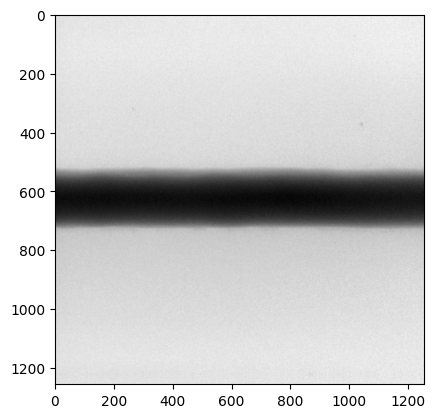

In [63]:
image = cv2.imread("/home/VirtualFlaw/Data/Dataset/20230407/Train/0/22C023-14-002-1st-1-(1)-29.jpg", cv2.IMREAD_GRAYSCALE)
image = image_centering(image, variance = 0)
plt.imshow(image, cmap='gray')